# PCA - Digit Dataset

In [1]:
from sklearn.datasets import load_digits

import pandas as pd
import numpy as np

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Model
from sklearn.neighbors import KNeighborsClassifier

# Train Test Split
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# PCA
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
digit_data = load_digits()

df = pd.DataFrame(digit_data.data, columns=digit_data.feature_names)
df["Target"] = digit_data.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [4]:
print(digit_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
print(digit_data.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


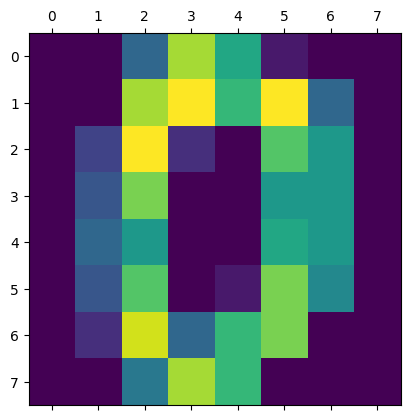

In [8]:
plt.matshow(digit_data.images[0])

--> 9
--> 6


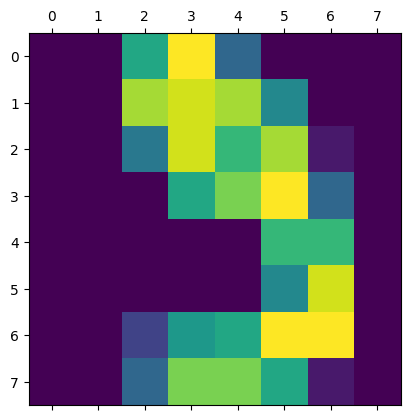

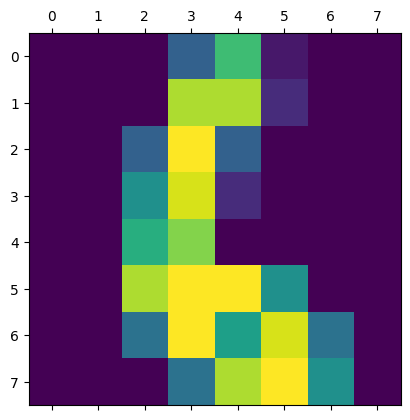

In [10]:
for i in range(105, 107):
    print("-->", digit_data.target[i])
    plt.matshow(digit_data.images[i])

In [11]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


### Train Test Split

In [13]:
x = df.drop("Target", axis= 1)
y = df['Target']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=25, stratify=y)

### without PCA

In [16]:
std_scalar =StandardScaler()

std_array = std_scalar.fit_transform(x_train)

x_train_std = pd.DataFrame(std_array, columns=x_train.columns)

In [18]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_std, y_train)
knn_model.score(x_train_std, y_train)

0.9866369710467706

### with PCA

In [26]:
# Scaling
std_scalar =StandardScaler()
std_array = std_scalar.fit_transform(x_train)
x_train_std = pd.DataFrame(std_array, columns=x_train.columns)

# instance
pca = PCA(n_components=None)

x_train_fit = pca.fit_transform(x_train_std)

pc_name = [f"PC{i}" for i in range(1,x_train_fit.shape[1] + 1)]

x_train_pca = pd.DataFrame(x_train_fit, columns=pc_name)

In [25]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_pca, y_train)
knn_model.score(x_train_pca, y_train)

0.9866369710467706

### Best Principal Components

In [46]:
# Scaling
std_scalar =StandardScaler()
std_array = std_scalar.fit_transform(x_train)
x_train_std = pd.DataFrame(std_array, columns=x_train.columns)

accuracy_list = []
for i in range(1,x_train_fit.shape[1] + 1):
#     print(i)
    pca = PCA(n_components=i)  # How many first iu component select for model training
    x_train_fit = pca.fit_transform(x_train_std)
    pc_name = [f"PC{i}" for i in range(1,x_train_fit.shape[1] + 1)]
    x_train_pca = pd.DataFrame(x_train_fit, columns=pc_name)
    
    knn_model = KNeighborsClassifier()
    knn_model.fit(x_train_pca, y_train)
    accuracy_list.append(knn_model.score(x_train_pca, y_train))
    
# accuracy_list  

In [45]:
pc_component = range(1, x_train_fit.shape[1] + 1)
# accuracy_list

Text(0, 0.5, 'Accuracy')

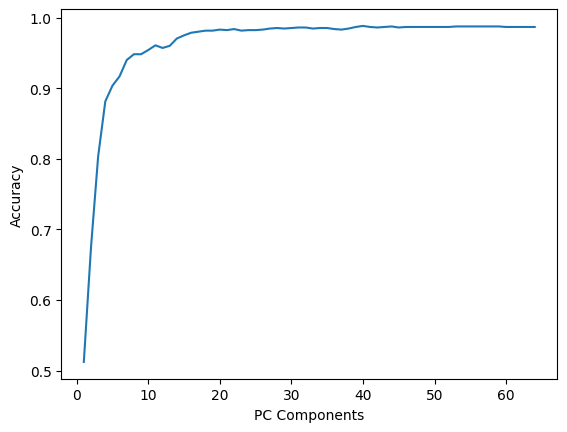

In [38]:
plt.plot(pc_component, accuracy_list)
plt.xlabel("PC Components")
plt.ylabel("Accuracy")

In [42]:
accuracy_list[10:40]

[0.9606533036377134,
 0.9569413511507052,
 0.9599109131403119,
 0.9703043801039347,
 0.9747587230883444,
 0.9784706755753526,
 0.9799554565701559,
 0.9814402375649591,
 0.9814402375649591,
 0.9829250185597624,
 0.9821826280623608,
 0.9836674090571641,
 0.9814402375649591,
 0.9821826280623608,
 0.9821826280623608,
 0.9829250185597624,
 0.9844097995545658,
 0.9851521900519673,
 0.9844097995545658,
 0.9851521900519673,
 0.985894580549369,
 0.985894580549369,
 0.9844097995545658,
 0.9851521900519673,
 0.9851521900519673,
 0.9836674090571641,
 0.9829250185597624,
 0.9844097995545658,
 0.9866369710467706,
 0.9881217520415738]

In [44]:
accuracy_list[38]

0.9866369710467706

In [65]:
# Scaling
std_scalar =StandardScaler()
std_array = std_scalar.fit_transform(x_train)
x_train_std = pd.DataFrame(std_array, columns=x_train.columns)

# instance
pca = PCA(n_components=None)
x_train_fit = pca.fit_transform(x_train_std)
pc_name = [f"PC{i}" for i in range(1,x_train_fit.shape[1] + 1)]
x_train_pca = pd.DataFrame(x_train_fit, columns=pc_name)

knn_model = KNeighborsClassifier()
knn_model.fit(x_train_pca, y_train)
knn_model.score(x_train_pca, y_train)

0.9866369710467706

### Method 2

In [53]:
# Scaling
std_scalar =StandardScaler()
std_array = std_scalar.fit_transform(x_train)
x_train_std = pd.DataFrame(std_array, columns=x_train.columns)

# instance
pca = PCA(n_components=None)
x_train_fit = pca.fit_transform(x_train_std)
pc_name = [f"PC{i}" for i in range(1,x_train_fit.shape[1] + 1)]
x_train_pca = pd.DataFrame(x_train_fit, columns=pc_name)

pca.get_covariance().shape

(64, 64)

In [57]:
array = np.cumsum(pca.explained_variance_ratio_)
array

array([0.11989855, 0.21500618, 0.30041036, 0.36597302, 0.41437007,
       0.45842179, 0.49746867, 0.53245685, 0.56238535, 0.5919442 ,
       0.62055856, 0.64662145, 0.66969446, 0.69175554, 0.71334085,
       0.73258021, 0.75078093, 0.76777711, 0.78344434, 0.79850751,
       0.81162223, 0.82372982, 0.83552782, 0.84602769, 0.85552504,
       0.864339  , 0.87292138, 0.88100282, 0.88876896, 0.89591363,
       0.90274276, 0.90941954, 0.91588879, 0.92223261, 0.92810956,
       0.93364333, 0.93861275, 0.94326904, 0.94756708, 0.95179933,
       0.95569907, 0.95947338, 0.96294337, 0.96629294, 0.96948319,
       0.97251326, 0.9753374 , 0.97809037, 0.9806034 , 0.98294383,
       0.9850806 , 0.98711445, 0.98912436, 0.99086545, 0.99257199,
       0.99411469, 0.99556633, 0.9969468 , 0.99817856, 0.99921363,
       1.        , 1.        , 1.        , 1.        ])

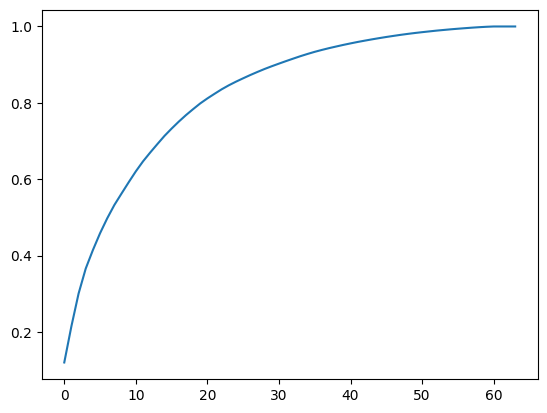

In [58]:
plt.plot(array)

In [59]:
np.where(array > 0.9)

(array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63],
       dtype=int64),)

## Testing on a single row

In [73]:
df.iloc[11]

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     0.0
pixel_0_3     0.0
pixel_0_4    14.0
             ... 
pixel_7_4    13.0
pixel_7_5    16.0
pixel_7_6     1.0
pixel_7_7     0.0
Target        1.0
Name: 11, Length: 65, dtype: float64

In [74]:
x.iloc[11]  # target value = 0

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     0.0
pixel_0_3     0.0
pixel_0_4    14.0
             ... 
pixel_7_3     1.0
pixel_7_4    13.0
pixel_7_5    16.0
pixel_7_6     1.0
pixel_7_7     0.0
Name: 11, Length: 64, dtype: float64

In [76]:
x_test_std = std_scalar.transform([x.iloc[11]])
x_test_pca = pca.transform(x_test_std)

prediction = knn_model.predict(x_test_pca)[0]
prediction

1